# STA 141B Assignment 4
## Part I: Covid Data

### Exercise 4.1

In this part, we will be using the the covidcast api, and you can find [the documentation here](https://cmu-delphi.github.io/delphi-epidata/).  We will be using the http api and you __should not__ use the `covidcast` python package.  Even though it is available, I want to test you on using the requests package and making http requests directly.

**Exercise 4.1.** Request the value for the smoothed_cli signal from the fb-survey datasource on 2022-01-01 for ALL STATES.  Notice that the request below is for counties and so you need to change this to states.  Do the same for smoothed_hh_cmnty_cli signal from the fb-survey data, and the confirmed_7dav_incidence_prop signal from the jhu-csse data source.  Create dataframes from these and join these 3 variables based on the state into a single dataframe.  Drop rows with missingness (there should be only about 5 of them dropped this way, corresponding to the US territories).  Finally, compute and output the spearman correlation between all variables in this dataframe (there should be 51 rows in the new dataset). 

* `smoothed_cli signal` from the `fb-survey` data source
* `smoothed_hh_cmnty_cli` signal from the `fb-survey` data source
* `confirmed_7dav_incidence_prop` signal from `the jhu-csse` data source

In [1]:
# Load required packages
import requests
import json
import time
# Use progress bar to check progress in Exercise 4.2
from tqdm.notebook import tqdm 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Write a function to return a dataframe based on the data_source and signal
def api_fbi(data_source, signal, time_values = '20220101'):
    """Return a dataframe based on data_source, signal, and time_values
    
    Client -----Get(url)-----> Server
    """
    #Make a request to a web page with parameters
    response = requests.get("https://api.covidcast.cmu.edu/epidata/api.php", 
                            params = {'endpoint':'covidcast', 'data_source': data_source,
                                      'signal': signal,'time_type':'day',
                                      'geo_type':'state', 'time_values':time_values, 'geo_value':'*'})
    #decode the result to dict
    result = response.json()
    """
    In the dict data: dict_keys(['epidata', 'result', 'message']
    The key 'epidata' stores the main data
    """
    key_dict = list(result.keys())[0]
    # Convert the dict data to dataframe
    results = pd.DataFrame(result[key_dict])
    return results

In [3]:
# smoothed_cli signal from the fb-survey data source
df1 = api_fbi('fb-survey', 'smoothed_cli')[['geo_value','value']].set_index('geo_value')
df1.head()

,value
geo_value,
ak,1.988426
al,4.107746
ar,2.533740
az,2.694759
ca,2.357308


In [4]:
# smoothed_hh_cmnty_cli signal from the fb-survey data source
df2 = api_fbi('fb-survey','smoothed_hh_cmnty_cli')[['geo_value','value']].set_index('geo_value')
df2.head()

,value
geo_value,
ak,26.718404
al,36.076034
ar,34.849508
az,31.895911
ca,29.062623


In [5]:
# confirmed_7dav_incidence_prop signal from the jhu-csse
df3 = api_fbi('jhu-csse','confirmed_7dav_incidence_prop')[['geo_value','value']].set_index('geo_value')
df3.head()

,value
geo_value,
ak,36.365002
al,82.811032
ar,97.342966
as,0.000000
az,67.372724


**Drop rows with missingness (there should be only about 5 of them dropped this way, corresponding to the US territories).**

In [6]:
# Join three dataframe
df = pd.concat([df1,df2,df3], axis=1)
print('Check #rows:',df.shape)
# Drop null values
df = df.dropna()
print('After dropping null values, check #rows:',df.shape)

Check #rows: (56, 3)
After dropping null values, check #rows: (51, 3)


**Finally, compute and output the spearman correlation between all variables in this dataframe (there should be 51 rows in the new dataset).**

In [7]:
df.columns = [['smoothed_cli','smoothed_hh_cmnty_cli','confirmed_7dav_incidence_prop']]
df

,smoothed_cli,smoothed_hh_cmnty_cli,confirmed_7dav_incidence_prop
geo_value,,,
ak,1.988426,26.718404,36.365002
al,4.107746,36.076034,82.811032
ar,2.533740,34.849508,97.342966
az,2.694759,31.895911,67.372724
ca,2.357308,29.062623,84.714756
co,3.208922,38.293050,201.896329
ct,4.462179,43.893939,143.101891
dc,4.347457,35.377358,295.027048
de,3.527615,39.746193,178.309220


,smoothed_cli,smoothed_hh_cmnty_cli,confirmed_7dav_incidence_prop
smoothed_cli,1.000000,0.82000,0.501719
smoothed_hh_cmnty_cli,0.820000,1.00000,0.630950
confirmed_7dav_incidence_prop,0.501719,0.63095,1.000000


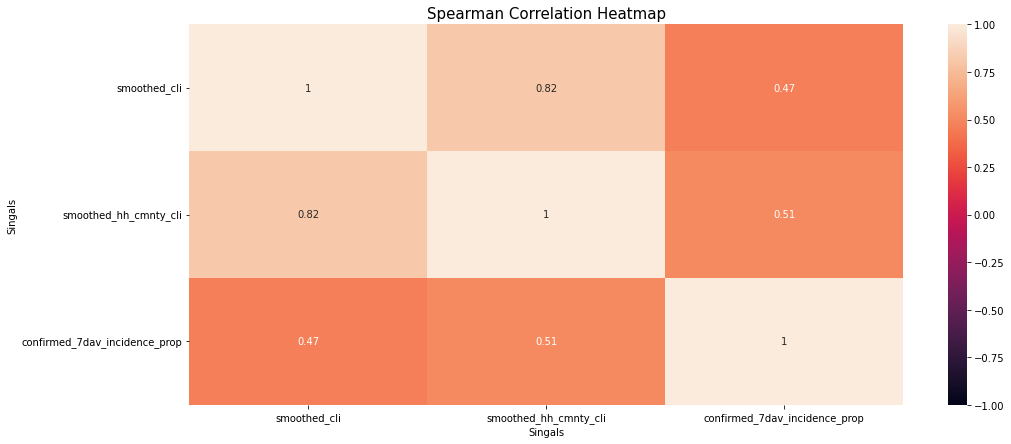

In [8]:
# Write a function that will calculate the spearman correlation 

def correlation(df):
    """ return a heatmap based on correlation values
    """
    # calculate the spearman correlation
    r = df.corr(method="spearman")
    plt.figure(figsize=(16,7)) #Set up size of canvas
    heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True) #Draw heatmap
    plt.title("Spearman Correlation Heatmap",fontsize = 15) #Set figure's title
    plt.xlabel("Singals")
    plt.ylabel("Singals")
    return(r)
correlation(df)

## Part II. Wage Data
### Exercise 4.2
**Exercise 4.2.** Consider the non-documented API from [ucannualwage.ucop.edu](https://ucannualwage.ucop.edu). We are interested in the median wage (gross pay) for UC Davis Deans from 2010 - 2021. Plot the median wage over all 12 years.

In [9]:
# column names based on website's database structures
cols = ['id','year','location','first_name','last_name','title',
      'gross_pay','regular_pay','overtime_pay','other_pay']

# Function 1
def converter(payload):
    """return total page number and datafame based on specific page number
    *nd is randomly picked
    
    Client -----Post(payload)-----> Server
    """
    url = 'https://ucannualwage.ucop.edu/wage/search.action'
    result = requests.post(url, data=payload)
    results = json.loads(result.text.replace("\'", "\""),strict=False)
    """
    In the dict data, the key 'total' stores the total page based on payload
    the key 'rows' stores the data
    """
    page_num = int(results['total'])
    resultDF = pd.DataFrame(results['rows'])
    #convert a list into dataframe columns per row
    resultDF = pd.DataFrame(resultDF["cell"].to_list(), columns=cols)
    return (page_num, resultDF)

# Function 2
def payroll_year(year):
    """Return the wage data from Davis in a sepcific year
    """
    payload = {'_search':'false','nd':'1666577780190','rows': 60, 'title':'Dean',
           'sidx': 'EAW_LST_NAM','page':'1','year': year, 'location':'Davis'}
    page_num,resultDF = converter(payload)
    
    #If the page number based on the serach condition is greater than 1
    #it will use a for loop to navigate to next page
    #tqdm is to view the progress bar offline
    for i in tqdm(range(2, page_num+1)):
        time.sleep(0.05)
        payload = {'_search':'false','nd':'1666577780190','rows': 60,'title':'Dean',
           'sidx': 'EAW_LST_NAM','page':i,'year': year, 'location':'Davis'}
        #use new poyload and get the data
        pageDF = converter(payload)[1]
        #Combine dataframe
        resultDF = pd.concat([resultDF, pageDF], ignore_index=True)
    
    print(f'Finish the web scrap of year {year}')
    return resultDF

In [10]:
# Generate year lists
year_lst = [2010+x for x in range(12)]
year_lst

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [11]:
# Median 
row_lst = []
for year in year_lst:
    # Filter title == Dean
    df = payroll_year(year)
    #calculate the median of gross pay in each years
    median = df['gross_pay'].median()
    row_lst.append([year,median])
#return to a dataframe
medianDF = pd.DataFrame(row_lst,columns = ['year','median'])

0it [00:00, ?it/s]

Finish the web scrap of year 2010


0it [00:00, ?it/s]

Finish the web scrap of year 2011


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2012


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2013


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2014


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2015


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2016


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2017


  0%|          | 0/1 [00:00<?, ?it/s]

Finish the web scrap of year 2018


0it [00:00, ?it/s]

Finish the web scrap of year 2019


0it [00:00, ?it/s]

Finish the web scrap of year 2020


0it [00:00, ?it/s]

Finish the web scrap of year 2021


In [12]:
#Check the median dataframe
medianDF

,year,median
0,2010,150993.28
1,2011,158600.01
2,2012,154000.02
3,2013,161569.00
4,2014,174241.50
5,2015,189262.00
6,2016,182318.50
7,2017,206505.00
8,2018,226928.00
9,2019,282060.50


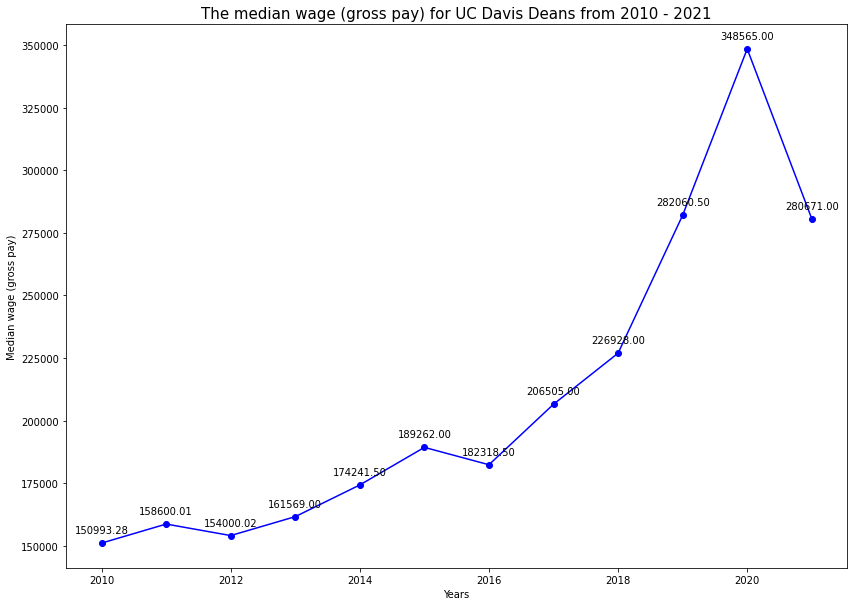

In [13]:
# Graph the line plot to see the trend
plt.figure(figsize=(14, 10))
plt.plot(medianDF['year'], medianDF['median'],'bo-')
plt.title("The median wage (gross pay) for UC Davis Deans from 2010 - 2021",fontsize = 15)
plt.xlabel("Years")
plt.ylabel("Median wage (gross pay)")

for x,y in zip(medianDF['year'],medianDF['median']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # position of the label
                 textcoords="offset points", #position of the text
                 xytext=(0,10), # distance from text to points
                 ha='center') # center the test

plt.show()